# マッピング

第10回の課題で利用したデータベースを利用．

以下のテーブルを利用して，地図上に各都道府県の平均最高気温を色で表現する．

## area_table
都道府県一覧

| prefecture_id | city_id | prefecture_name | city_name |
|:-----------:|:------------:|:------------:|:------------:|
|1|1400|Hokkaido|Sapporo|
|2|3110|Aomori|Aomori|
|3|3310|Iwate|Morioka|
|...|...|...|...|

## location_table
都道府県座標一覧

| prefecture_id | location_x | location_y |
|:-----------:|:------------:|:------------:|
|1|564|128|
|2|484|271|
|3|509|326|
|...|...|...|

## weather_table
各都道府県の天気情報

| prefecture_id|city_id|year|month|day|day_week|weather|highest| ...|
|:-----------:|:------------:|:------------:|:-----------:|:------------:|:------------:|:------------:|:------------:|
|1|1400|2004|7|1|Thu|Fine|18.1|...|
|1|1400|2004|7|2|Fri|Fine|23.8|...|
|1|1400|2004|7|3|Sat|Fine|25.6|...|
|...|...|...|...|...|...|...|...|...|



In [1]:
import pandas as pd
import urllib
from IPython.display import display

# prefecture_name, location_x, location_yが含まれる結果を取得
sql = """
SELECT at.prefecture_id AS prefecture_id, prefecture_name, location_x, location_y 
FROM area_table AS at, location_table AS lt 
WHERE at.prefecture_id = lt.prefecture_id
"""
sql = urllib.parse.quote(sql)
url = "http://course.mpkato.net/scripts/iam/json.php?query=" + sql

pref_locations = pd.read_json(url) # SQLの結果を読み込む
display(pref_locations[:5]) # 5行文だけ表示

,location_x,location_y,prefecture_id,prefecture_name
0,564,128,1,Hokkaido
1,484,271,2,Aomori
2,509,326,3,Iwate
3,487,383,4,Miyagi
4,462,316,5,Akita


## 日本地図上の各都道府県の位置に丸を描画

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 日本地図を描画
# japan_map.png は http://course.mpkato.net/scripts/iam/japan_map.png からダウンロードし notebookファイル (*.ipynb)と同じフォルダに置くこと
im = Image.open("./japan_map.png")
plt.figure(figsize=(7, 7.55)) # 座標サイズ指定
plt.imshow(np.asarray(im)) #画像を表示
plt.show()

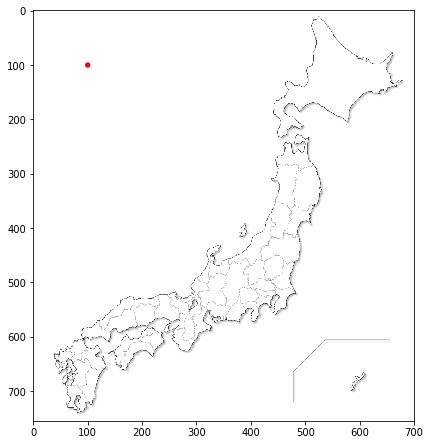

In [3]:
import matplotlib.patches as patches

RED_COLOR = (255.0/255, 0.0/255, 0.0/255) # RGBで指定．各値は0から1の間． 1.0が255に対応．

# 1つの円を描画
plt.figure(figsize=(7, 7.55))  # 座標サイズ指定
ax = plt.axes()
ax.imshow(np.asarray(im)) # 画像を表示
c = patches.Circle(xy=(100, 100), radius=5, fc=RED_COLOR) # (100, 100)を中心とする半径5の円．fcは色を表す．
ax.add_patch(c) # 円cを追加
plt.show()

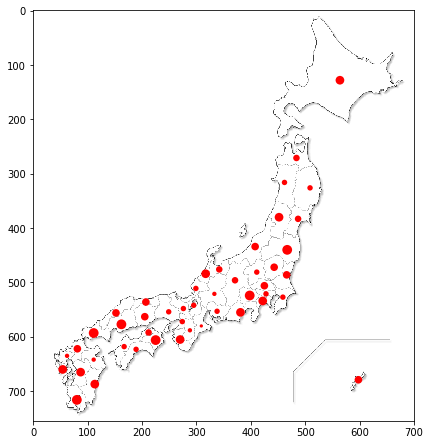

In [4]:
plt.figure(figsize=(7, 7.55))  # 座標サイズ指定
ax = plt.axes()
ax.imshow(np.asarray(im)) # 画像を表示

# 各都道府県に円を描画
for idx, pref in pref_locations.iterrows():
    r = len(pref.prefecture_name)
    c = patches.Circle(xy=(pref.location_x, pref.location_y), radius=r, fc=RED_COLOR) # 各都道府県の位置に円を作成．円の大きさは都道府県の名前の長さ
    ax.add_patch(c) # 円cを追加
plt.show()

## 各都道府県の年間平均最高気温を色で表現

,highest,location_x,location_y,prefecture_id,prefecture_name
0,13.063036,564,128,1,Hokkaido
1,14.608587,484,271,2,Aomori
2,15.042363,509,326,3,Iwate
3,16.605604,487,383,4,Miyagi
4,15.867487,462,316,5,Akita


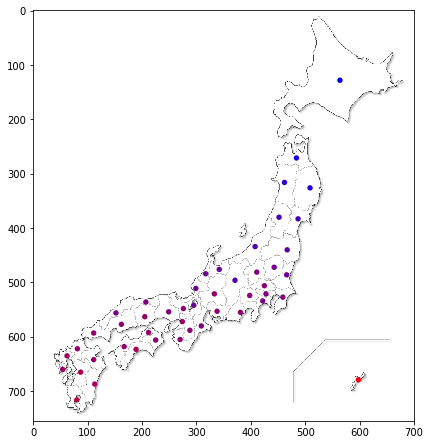

In [5]:
# 年間平均最高気温も含めてSQLでデータベースの内容を取得
sql = """
SELECT at.prefecture_id AS prefecture_id, prefecture_name, location_x, location_y, AVG(highest) as highest
FROM area_table AS at, location_table AS lt, weather_table AS wt
WHERE at.prefecture_id = lt.prefecture_id AND at.prefecture_id = wt.prefecture_id
GROUP BY at.prefecture_id
"""
sql = urllib.parse.quote(sql)
url = "http://course.mpkato.net/scripts/iam/json.php?query=" + sql

pref_locations = pd.read_json(url) # SQLの結果を読み込む
display(pref_locations[:5]) # 5行文だけ表示

plt.figure(figsize=(7, 7.55))  # 座標サイズ指定
ax = plt.axes()
ax.imshow(np.asarray(im)) # 画像を表示

for idx, pref in pref_locations.iterrows():
    # 最高気温平均が高いと赤，低いと青になるように色を調整
    r = pref.highest - 13
    color = (r / 14, 0, (14 - r) / 14) # 各値はRGB（赤，緑，青）の強さを表す
    
    c = patches.Circle(xy=(pref.location_x, pref.location_y), radius=5, fc=color) # 各都道府県の位置に円を作成．円の大きさは都道府県の名前の長さ
    ax.add_patch(c) # 円cを追加
plt.show()

# 時系列

以下のweather_tableを利用して，北海道の気温変化を表現する．

## weather_table
各都道府県の天気情報（北海道はprefecture_id=1）

| prefecture_id|city_id|year|month|day|day_week|weather|highest| ...|
|:-----------:|:------------:|:------------:|:-----------:|:------------:|:------------:|:------------:|:------------:|
|1|1400|2004|7|1|Thu|Fine|18.1|...|
|1|1400|2004|7|2|Fri|Fine|23.8|...|
|1|1400|2004|7|3|Sat|Fine|25.6|...|
|...|...|...|...|...|...|...|...|...|


http://course.mpkato.net/scripts/iam/json.php?query=SELECT%20%2A%20FROM%20weather_table%20WHERE%20prefecture_id%20%3D%201%20AND%20year%20%3D%202006%20AND%20month%20%3D%202


,air_pressure,city_id,day,day_week,dewpoint,highest,humidity,lowest,month,prefecture_id,rainfall_level,sunrise,sunset,weather,wind_direction,wind_speed,year
0,1017.1,1400,1,Wed,-10.0,-2.0,55,-9.5,2,1,0.0,---,---,Cloudy,NNE,2,2006
1,1013.1,1400,2,Thu,-14.4,-2.5,54,-7.2,2,1,0.5,---,---,Snow,NNW,4,2006
2,1008.6,1400,3,Fri,-19.3,-7.1,39,-10.9,2,1,0.0,---,---,Fine,W,5,2006
3,1012.1,1400,4,Sat,-6.3,-2.8,88,-6.4,2,1,2.5,---,---,Snow,NW,7,2006
4,1015.3,1400,5,Sun,-9.1,-2.6,66,-11.0,2,1,0.0,---,---,Fine,NW,4,2006


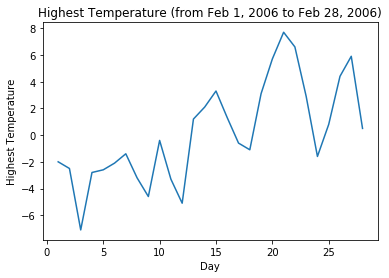

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import urllib
from IPython.display import display

# 北海道の2006年2月の天気情報を取得
sql = "SELECT * FROM weather_table WHERE prefecture_id = 1 AND year = 2006 AND month = 2"
sql = urllib.parse.quote(sql) # URLエンコード（URL中に含めても問題ないような形式に変換）
url = "http://course.mpkato.net/scripts/iam/json.php?query=" + sql
print(url) # 確認できるようにURLを表示

weather = pd.read_json(url) # データベースから結果を取得
display(weather[:5]) # 5行文だけ表示
    
# 最高気温を日ごとに表示
plt.plot(weather["day"], weather["highest"])
plt.xlabel("Day")
plt.ylabel("Highest Temperature")
plt.title("Highest Temperature (from Feb 1, 2006 to Feb 28, 2006)")
plt.show()

# ネットワークとグラフ

Karate Network Datasetの内容を表現する．
https://en.wikipedia.org/wiki/Zachary%27s_karate_club

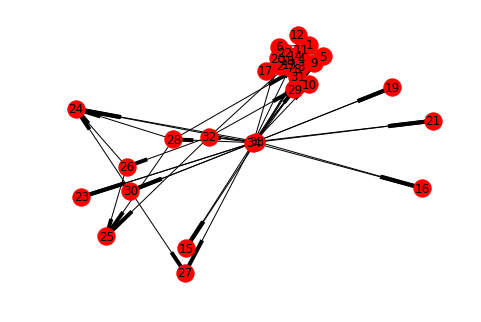

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Karate Network Dataset (https://en.wikipedia.org/wiki/Zachary%27s_karate_club)
# ノードのIDを列挙
karate_nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
# エッジをIDのペアで表現． e.g. [2, 1]: ノード２からノード1へエッジがある．
karate_edges = [
    [2, 1], 
    [3, 1], [3, 2], 
    [4, 1], [4, 2], [4, 3], 
    [5, 1], 
    [6, 1], 
    [7, 1], [7, 5], [7, 6], 
    [8, 1], [8, 2], [8, 3], [8, 4], 
    [9, 1], [9, 3], 
    [10, 3], 
    [11, 1], [11, 5], [11, 6], 
    [12, 1], 
    [13, 1], [13, 4], 
    [14, 1], [14, 2], [14, 3], [14, 4], 
    [17, 6], [17, 7], 
    [18, 1], [18, 2], 
    [20, 1], [20, 2], 
    [22, 1], [22, 2], 
    [26, 24], [26, 25], 
    [28, 3], [28, 24], [28, 25], 
    [29, 3], 
    [30, 24], [30, 27], 
    [31, 2], [31, 9], 
    [32, 1], [32, 25], [32, 26], [32, 29], 
    [33, 3], [33, 9], [33, 15], [33, 16], [33, 19], [33, 21], [33, 23], [33, 24], [33, 30], [33, 31], [33, 32], 
    [34, 9], [34, 10], [34, 14], [34, 15], [34, 16], [34, 19], [34, 20], [34, 21], [34, 23], [34, 24], [34, 27], [34, 28], [34, 29], [34, 30], [34, 31], [34, 32], [34, 33], 
]

# 有向グラフの定義
graph = nx.DiGraph()
labels = {}
# ノードを追加
for node in karate_nodes:
    graph.add_node(node)    
    labels[node] = node
# エッジを追加
for start_node, end_node in karate_edges:
    # add edges
    graph.add_edge(start_node, end_node)

# グラフを描画
pos = nx.spring_layout(graph) # ノードの位置をバネモデルによって決定
nx.draw(graph, pos) # posで指定された位置へグラフを描画
nx.draw_networkx_labels(graph, pos, labels, font_size=12) # ノードのラベルを描画
plt.show()

# 関連と相関

第10回の課題で利用されていたデータベースに含まれる，下記の3つのテーブルを用いて，農作物と気温の相関関係を視覚化する．

## area_table
都道府県一覧

| prefecture_id | city_id | prefecture_name | city_name |
|:-----------:|:------------:|:------------:|:------------:|
|1|1400|Hokkaido|Sapporo|
|2|3110|Aomori|Aomori|
|3|3310|Iwate|Morioka|
|...|...|...|...|

## weather_table
各都道府県の天気情報

| prefecture_id|city_id|year|month|day|day_week|weather|highest| ...|
|:-----------:|:------------:|:------------:|:-----------:|:------------:|:------------:|:------------:|:------------:|
|1|1400|2004|7|1|Thu|Fine|18.1|...|
|1|1400|2004|7|2|Fri|Fine|23.8|...|
|1|1400|2004|7|3|Sat|Fine|25.6|...|
|...|...|...|...|...|...|...|...|...|

## jpstats

統計情報一覧

|id|title|etitle|
|:-----------:|:------------:|:------------:|
|1|面積 (km2)|Area size (km2)|
|2|人口 (人)|Population (people)|
|3|人口密度 (1km2あたり）|Population density (people/km2)|
|...|...|...|

## jpstatdata

各都道府県の統計情報の値．
例えば，1行目は秋田県（prefecture_id = 5）の人口増加率 (％)（id = 4）が-5.2%であることを意味している．
	
|id|prefecture_id|statval|
|:-----------:|:------------:|:------------:|
|4|5|-5.2|
|4|2|-4.4|
|4|3|-4|
|...|...|...|

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import urllib
from IPython.display import display

# 各都道府県の平均最高・最低気温を昇順で取得
sql = """
SELECT at.prefecture_id AS prefecture_id, prefecture_name, AVG(highest) AS highest, AVG(lowest) AS lowest
FROM area_table AS at, weather_table AS wt 
WHERE at.prefecture_id = wt.prefecture_id
GROUP BY at.prefecture_id
ORDER BY AVG(highest) ASC
"""
sql = urllib.parse.quote(sql) # URLエンコード（URL中に含めても問題ないような形式に変換）
url = "http://course.mpkato.net/scripts/iam/json.php?query=" + sql
print(url) # 確認できるようにURLを表示

weather = pd.read_json(url) # データベースから結果を取得
display(weather[:5]) # 5行文だけ表示

# 各都道府県のりんごの生産量(id = 36)を降順で取得
sql = """
SELECT at.prefecture_id AS prefecture_id, prefecture_name, statval
FROM area_table AS at, jpstatdata AS st 
WHERE at.prefecture_id = st.prefecture_id AND id = 36
ORDER BY statval DESC
"""
sql = urllib.parse.quote(sql) # URLエンコード（URL中に含めても問題ないような形式に変換）
url = "http://course.mpkato.net/scripts/iam/json.php?query=" + sql
print(url) # 確認できるようにURLを表示

stat = pd.read_json(url) # データベースから結果を取得
display(stat[:5]) # 5行文だけ表示

http://course.mpkato.net/scripts/iam/json.php?query=%0ASELECT%20at.prefecture_id%20AS%20prefecture_id%2C%20prefecture_name%2C%20AVG%28highest%29%20AS%20highest%2C%20AVG%28lowest%29%20AS%20lowest%0AFROM%20area_table%20AS%20at%2C%20weather_table%20AS%20wt%20%0AWHERE%20at.prefecture_id%20%3D%20wt.prefecture_id%0AGROUP%20BY%20at.prefecture_id%0AORDER%20BY%20AVG%28highest%29%20ASC%0A


,highest,lowest,prefecture_id,prefecture_name
0,13.063036,6.169589,1,Hokkaido
1,14.608587,7.518144,2,Aomori
2,15.042363,6.794924,3,Iwate
3,15.867487,9.035950,5,Akita
4,16.605604,9.577999,4,Miyagi


http://course.mpkato.net/scripts/iam/json.php?query=%0ASELECT%20at.prefecture_id%20AS%20prefecture_id%2C%20prefecture_name%2C%20statval%0AFROM%20area_table%20AS%20at%2C%20jpstatdata%20AS%20st%20%0AWHERE%20at.prefecture_id%20%3D%20st.prefecture_id%20AND%20id%20%3D%2036%0AORDER%20BY%20statval%20DESC%0A


,prefecture_id,prefecture_name,statval
0,2,Aomori,367600
1,20,Nagano,139900
2,3,Iwate,42200
3,6,Yamagata,30800
4,7,Fukushima,26300


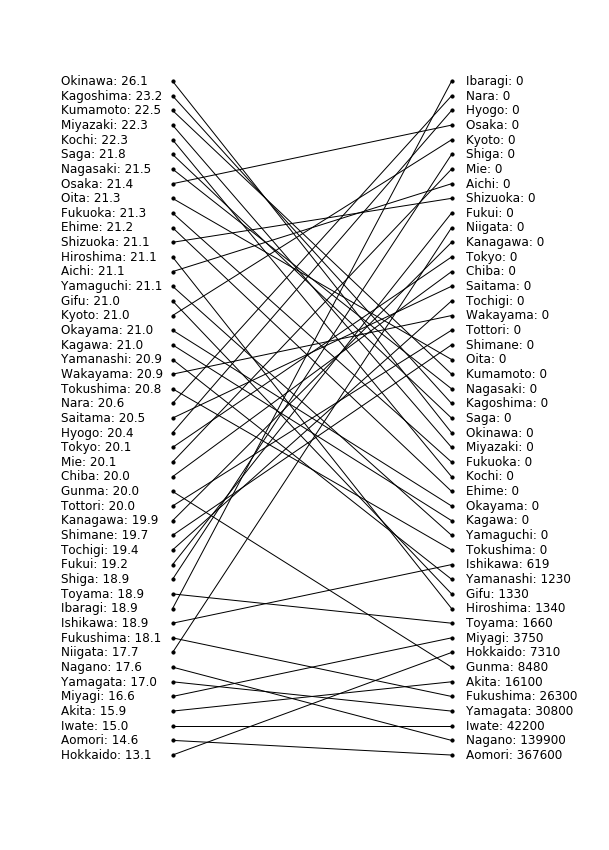

In [9]:
#ノードのIDを列挙
weather_nodes = weather["prefecture_id"]
stat_nodes = stat["prefecture_id"] * 100 # weather_nodeのIDと重複しないように100倍しておく
# エッジをIDのペアで表現． e.g. [2, 1]: ノード２からノード1へエッジがある．
edges = []
for node in weather_nodes:
    # weather_nodesとstat_nodesのうち，IDが10倍の関係になっているものは同じ都道府県
    edges.append((node, 100 * node))

# 無向グラフの定義
graph = nx.Graph()
# ノードを追加
for node in weather_nodes:
    graph.add_node(node)
for node in stat_nodes:
    graph.add_node(node)
# エッジを追加
for start_node, end_node in edges:
    # add edges
    graph.add_edge(start_node, end_node)
# ラベルを定義
labels = {}
for idx, row in weather.iterrows():
    labels[row.prefecture_id] = row.prefecture_name + ": %0.1f" % row.highest
for idx, row in stat.iterrows():
    labels[row.prefecture_id * 100] = row.prefecture_name + ": %0.0f" % row.statval

# ノードとラベルの場所を指定
pos = {}
label_pos = {}
# weather_nodesは平均最高気温が低い順に縦に１０刻みで並ぶようにする
for idx, node in enumerate(weather_nodes):
    pos[node] = (5, idx * 10)
    label_pos[node] = (1, idx * 10) # ラベルは左に配置
# stat_nodesは生産量が少ない順に縦に１０刻みで並ぶようにする
for idx, node in enumerate(stat_nodes):
    pos[node] = (15, idx * 10)
    label_pos[node] = (15.5, idx * 10) # ラベルは少し右に配置

# グラフを描画
plt.figure(figsize=(10, 15)) # グラフのサイズを10 x 15に変更
nx.draw_networkx_nodes(graph, pos, node_size=10, node_color=(0, 0, 0)) # posで指定された位置へグラフを描画
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, label_pos, labels, font_size=12, horizontalalignment="left") # ノードのラベルを描画
plt.xlim(0, 20) # x軸の範囲を[0, 20]に変更
plt.axis('off') # x軸，y軸を非表示
plt.show()

# 散布図

上記の関連と相関と同じデータ，農作物と気温の相関関係を散布図で視覚化する．

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import urllib
from IPython.display import display

# 各都道府県の平均最高・最低気温，すいかの生産量（id = 36）を取得
sql = """
SELECT at.prefecture_id AS prefecture_id, prefecture_name, AVG(highest) AS highest, AVG(lowest) AS lowest, statval
FROM area_table AS at, weather_table AS wt,  jpstatdata AS st 
WHERE at.prefecture_id = wt.prefecture_id
AND at.prefecture_id = st.prefecture_id AND id = 36
GROUP BY at.prefecture_id
ORDER BY statval DESC
"""
sql = urllib.parse.quote(sql) # URLエンコード（URL中に含めても問題ないような形式に変換）
url = "http://course.mpkato.net/scripts/iam/json.php?query=" + sql
print(url) # 確認できるようにURLを表示

stat_weather = pd.read_json(url) # データベースから結果を取得
display(stat_weather[:5]) # 5行文だけ表示

http://course.mpkato.net/scripts/iam/json.php?query=%0ASELECT%20at.prefecture_id%20AS%20prefecture_id%2C%20prefecture_name%2C%20AVG%28highest%29%20AS%20highest%2C%20AVG%28lowest%29%20AS%20lowest%2C%20statval%0AFROM%20area_table%20AS%20at%2C%20weather_table%20AS%20wt%2C%20%20jpstatdata%20AS%20st%20%0AWHERE%20at.prefecture_id%20%3D%20wt.prefecture_id%0AAND%20at.prefecture_id%20%3D%20st.prefecture_id%20AND%20id%20%3D%2036%0AGROUP%20BY%20at.prefecture_id%0AORDER%20BY%20statval%20DESC%0A


,highest,lowest,prefecture_id,prefecture_name,statval
0,14.608587,7.518144,2,Aomori,367600
1,17.601614,8.366805,20,Nagano,139900
2,15.042363,6.794924,3,Iwate,42200
3,16.960093,8.266250,6,Yamagata,30800
4,18.125197,9.743631,7,Fukushima,26300


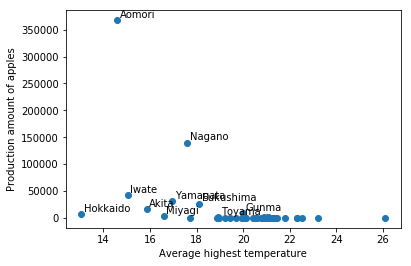

In [11]:
# 散布図を描画
plt.scatter(x=stat_weather["highest"], y=stat_weather["statval"])
# 上位10件のみラベルを付与
for idx, row in stat_weather[:10].iterrows():
    # 点に被らないように少しラベルをずらしている
    plt.text(x=row.highest+0.1, y=row.statval+5000, s=row.prefecture_name)
plt.xlabel("Average highest temperature")
plt.ylabel("Production amount of apples")
plt.show()

# 木構造，階層，再帰

京都大学 Webサイト http://www.kyoto-u.ac.jp/ をTreeMap (https://en.wikipedia.org/wiki/Treemapping) によって表現する．

`pip install squarify`を事前に実行してsquarifyをインストールする必要がある．Jupyterを再起動する必要があることに注意．

In [12]:
# 京都大学のサイトマップ（一部）
sitemap = [
["About Kyoto University",
[
"Message from the President",
"Operation and future plans",
"University profile",
"Human rights",
"Health, safety, and environment",
"Employment",
"Gender equality",
"Response to the Great East Japan Earthquake",
"Response to the 2016 Kumamoto Earthquake",
"Public relations",
"Disclosure of information",
]
],
["Education and Student Support",
[
"Policies",
"Campus life",
"Student support",
"International education",
"University facilities",
"Admissions",
"Academic calendar",
"University education support programs",
"Publications",
"Kyoto iUP",
"Lifelong email forwarding",
]
],
["Research and Collaboration",
[
"Overview: To wander with purpose",
"Research",
"Research support system",
"Young researcher support",
"Kyoto U Research News",
"Family support",
"Forefronts of Research",
"External funds",
"Security export control",
]
]
]

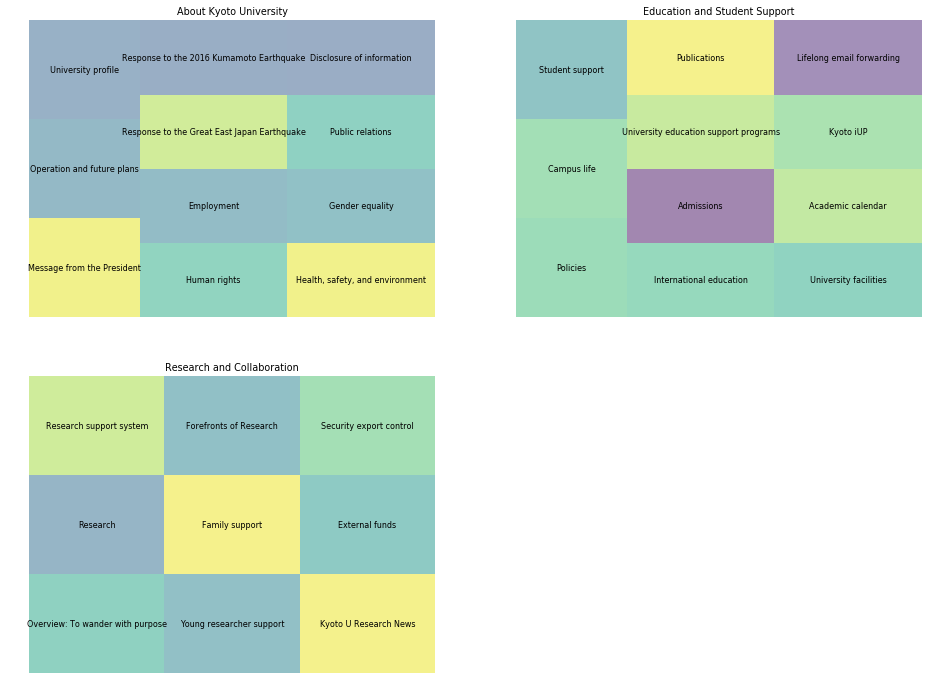

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import squarify
matplotlib.rcParams["font.size"] = 8 # デフォルトのフォントサイズを変更

fig = plt.figure(figsize=(16, 12))
for idx, (first_cat_name, second_cat_names) in enumerate(sitemap):
    ax = fig.add_subplot(2, 2, idx+1) # 2x2の描画場所を用意し，そのidx+1番目を取得
    squarify.plot(sizes=[1]*len(second_cat_names), label=second_cat_names, alpha=0.5, ax=ax) # Treemapを描画
    ax.set_title(first_cat_name) # タイトルを描画
    ax.axis('off') # 軸を非表示にする
plt.show()